In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from array import array

read_dset = pd.read_csv('Datasets/agricultural_lands_dataset.csv')
read_dset = read_dset[(read_dset['Country Name'] == 'India') | (read_dset['Country Name'] == 'Philippines')]

read_dump = array('i', [])
read_phDt = array('f', [])
read_inDt = array('f', [])
read_year = array('i', [])

# Dropping columns that is unneccessary or does not contain any usable data.
drp_landD = ['Country Name', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972'
                , '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986'
                , '1987', '1988', '1989', '1990']

read_dset = read_dset.drop(labels=drp_landD, axis=1)

for land_index, land_value in enumerate(read_dset.columns):
    read_year.append(int(land_value))
    for land_items in read_dset[land_value].items():
        if land_index in read_dump:
            read_phDt.append(float(land_items[1]))
        else:
            read_inDt.append(float(land_items[1]))
            read_dump.append(land_index)
            

print(read_phDt)
print(read_year)

array('f', [37.418251037597656, 37.27739334106445, 37.109703063964844, 36.942012786865234, 36.942012786865234, 37.24385452270508, 38.01522445678711, 37.847537994384766, 37.679847717285156, 37.67649459838867, 37.50880432128906, 37.34446716308594, 37.696617126464844, 38.467987060546875, 38.08230209350586, 38.83690643310547, 39.541202545166016, 40.27903366088867, 40.580875396728516, 40.580875396728516, 41.11748504638672, 41.68762969970703, 41.818424224853516, 41.915687561035156, 42.01294708251953, 42.110206604003906, 42.20746612548828, 42.304725646972656, 42.40198516845703, 42.509307861328125])
array('i', [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])


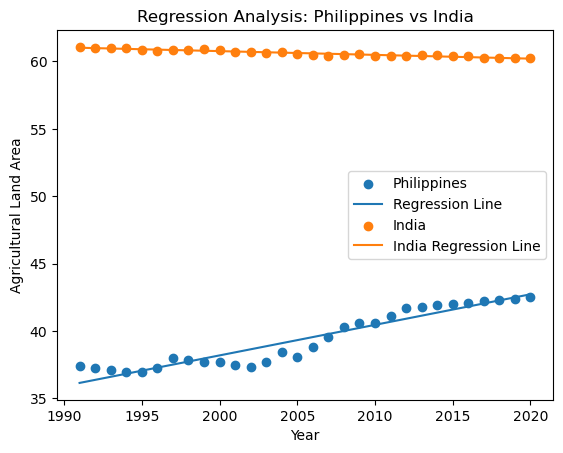

In [38]:
# Perform regression analysis
coeff_philippines = np.polyfit(read_year, read_phDt, 1)  # Fit a linear regression line
regression_philippines = np.polyval(coeff_philippines, read_year)  # Generate the regression line

coeff_india = np.polyfit(read_year, read_inDt, 1)  # Fit a linear regression line
regression_india = np.polyval(coeff_india, read_year)  # Generate the regression line


# Plotting regression analysis
plt.scatter(read_year, read_phDt, label='Philippines')
plt.plot(read_year, regression_philippines, label='Regression Line')

plt.scatter(read_year, read_inDt, label='India')
plt.plot(read_year, regression_india, label='India Regression Line')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Agricultural Land Area')
plt.title('Regression Analysis: Philippines vs India')

# Add legend
plt.legend()

# Show the plot
plt.show()